# Example 1: Pulse Shaping and Modulating Carrier Signals

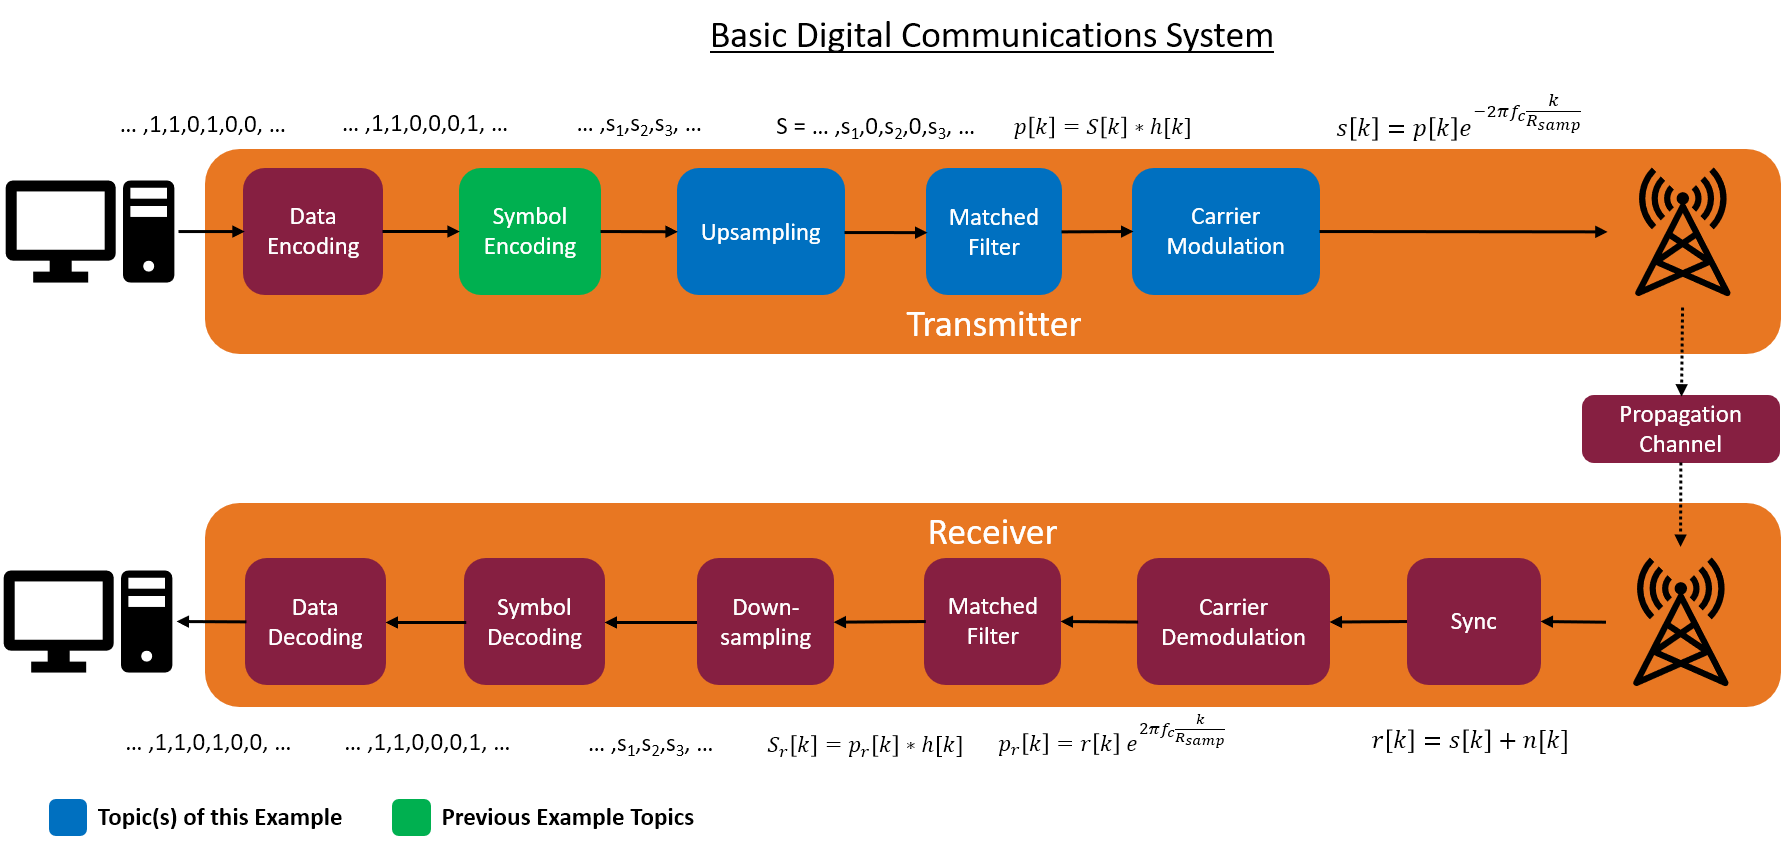

In this notebook example, we will briefly introduce the concepts of pulse shaping and modulating carrier signals using linear digital amplitude-phase modulations (LDAPMs). It is strongly encouraged to review Example 0 before going through this example to learn about LDAPMs. More specifically, this example will utilize pulse shaping and carrier modulation in order to create digital communications signals. 

A [discrete](https://en.wikipedia.org/wiki/Discrete_time_and_continuous_time#Discrete_time) digital communications signal $s[k]$, in [complex baseband notation](https://en.wikipedia.org/wiki/Baseband#Equivalent_baseband_signal) (to be discussed in more detail in a later example), can be defined as

$s[k] = p[k]e^{-2{\pi}f_c\frac{k}{R_{samp}}}$,

where $k$ is the discrete sample index of the signal, $p[k]$ is the pulse shaped modulated symbols, and the exponential term is the complex sinusoidal carrier signal, with center frequency $f_c$, being modulated ($R_{samp}$ is the sample rate and will be discussed later in this exercise). 

Here, the pulse-shaped modulated symbols $p[k]$ are defined as

$p[k] = S[k] * h[k]$, 

where $S[k]$ is the [upsampled](https://en.wikipedia.org/wiki/Upsampling) modulated symbol stream, $h[k]$ is the pulse shaping function, and $*$ denotes the convolution operation.

From [Wikipedia](https://en.wikipedia.org/wiki/Pulse_shaping):
>In electronics and telecommunications, **pulse shaping** is the process of changing the waveform of transmitted pulses. Its purpose is to make the transmitted signal better suited to its purpose or the communication channel, typically by limiting the effective bandwidth of the transmission. By filtering the transmitted pulses this way, the intersymbol interference caused by the channel can be kept in control. In RF communication, pulse shaping is essential for making the signal fit in its frequency band. 

In this example, we will begin by looking at the pulse shaping process (i.e. the creation of $p[k]$) for two different pulse shaping functions and then briefly look at modulating the carrier signal to create the digital communications signal $s[k]$.

*Note: Within this notebook example, make sure you execute each codeblock before proceeding to the next section.*

In [1]:
# Setting Imports and Pathing for Example
import sys
sys.path.append("../")

import numpy as np
import src.modems as modems
import src.channels as channels
import matplotlib.pyplot as plt

# Setting Plotting Parameters for Example
span          = 10
total_symbs_1 = 10
total_symbs_2 = 100000

fs   = 1.0
nfft = 256

fontsize = 18
figsize  = (20, 10)

## Pulse Shaping

We begin by instantiating an LDAPM modem and generating a random set of symbols (with replacement) from the modulation's symbol set (see Example 0 for more information). We then plot the first few randomly generated symbols.

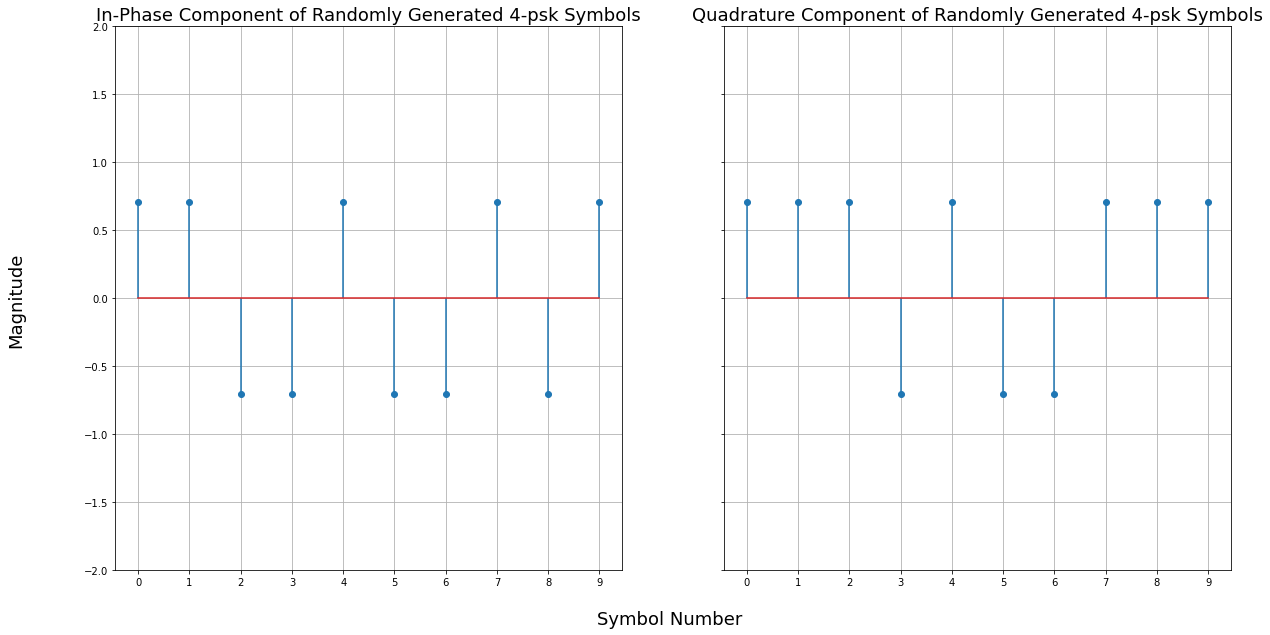

In [2]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(mod_type=mod_type, mod_order=mod_order)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_1)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
plt.ylim([-2.0, 2.0])
axs[0].grid()
axs[1].grid()
axs[0].set_title('In-Phase Component of Randomly Generated ' + str(mod_order) + '-' + mod_type + ' Symbols', fontsize=fontsize)
axs[1].set_title('Quadrature Component of Randomly Generated ' + str(mod_order) + '-' + mod_type + ' Symbols', fontsize=fontsize)
fig.text(0.51, 0.05, 'Symbol Number', ha='center', fontsize=fontsize)
fig.text(0.05, 0.50, 'Magnitude', va='center', rotation='vertical', fontsize=fontsize)

# Plotting a Subset of the Randomly Generated LDAPM Symbols
axs[0].stem(rand_symbols.real)
axs[1].stem(rand_symbols.imag)
plt.xticks(np.arange(0, total_symbs_1))
plt.show()

*Exercise: Try changing the mod_type and mod_order parameters in the code block above to see the impact of choosing different LDAPM types and orders. Also note that the random sequence of symbols is different for each run.*

As previously defined, the pulse-shaped modulated symbols are defined as

$p[k] = S[k] * h[k]$.

Pulse shaping is a two step operation. The generated symbol set is first upsampled and then filtered by the pulse shaping function $h[k]$ through the [convolution](https://en.wikipedia.org/wiki/Convolution) operation.

The amount of upsampling performed on the generated symbol set is defined as the samples per symbol (**for this example, the samples per symbol will be assumed to be an integer value for ease of discussion, but is not required in practice**). 

The relationship between the [sample rate](https://en.wikipedia.org/wiki/Sampling_(signal_processing)) $R_{samp}$ and the [symbol rate](https://en.wikipedia.org/wiki/Symbol_rate) $R_{symb}$ of a digital communications signal is defined as

$R_{symb} = \frac{R_{samp}}{sps}$,

where $sps$ is the samples per symbol and the rates have units of [Hertz](https://en.wikipedia.org/wiki/Hertz). The [data rate](https://en.wikipedia.org/wiki/Bit_rate), in bits, is therefore defined as:

$R_{b} = R_{symb}\cdot{mod_{order}}$.

The data rate, as the name implies, is how fast data bits are transmitted by the digital communications signal. 

*Note: For the analysis that follows, $R_{samp}$ will be assumed to be 1 Hz (i.e. 1 sample per second) without loss of generality.*

### Square Pulse Shaping
First, we will look at the simplest pulse shaping function, a square pulse. 

*In the following figures, the blue plot represents $p[k]$ and the red plot represents $S[k]$.*

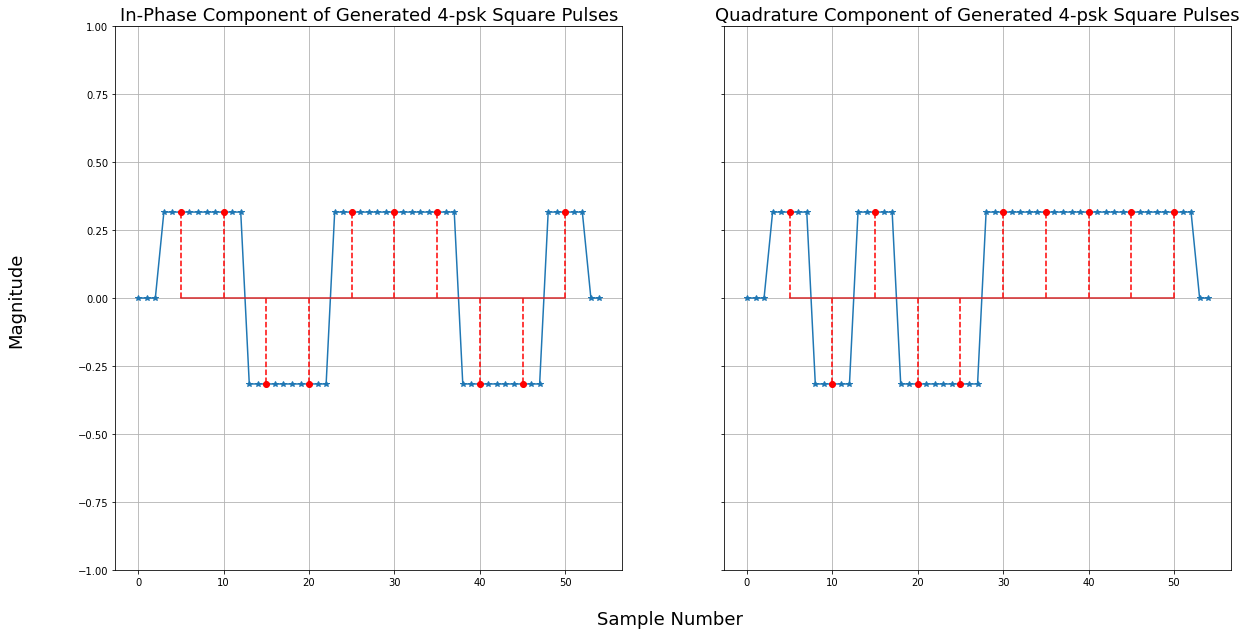

In [3]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 5    # Options: Any odd positive integer > 1

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='sqr', span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_1)

# Pulse Shaping the Random LDAPM Symbols with a Square Pulse Shape
ldapm_rand_square_pulses = ldapm_modem.get_samps(rand_symbols)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
plt.ylim([-1.0,1.0])
axs[0].grid()
axs[1].grid()
axs[0].set_title('In-Phase Component of Generated ' + str(mod_order) + '-' + mod_type + ' Square Pulses', fontsize=fontsize)
axs[1].set_title('Quadrature Component of Generated ' + str(mod_order) + '-' + mod_type + ' Square Pulses', fontsize=fontsize)
fig.text(0.51, 0.05, 'Sample Number', ha='center', fontsize=fontsize)
fig.text(0.05, 0.50, 'Magnitude', va='center', rotation='vertical', fontsize=fontsize)

# Plotting a Subset of the Generated Square Pulses
axs[0].plot(ldapm_rand_square_pulses.real, '-*')
axs[1].plot(ldapm_rand_square_pulses.imag, '-*')
axs[0].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_square_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].real, linefmt='--r', markerfmt='ro')
axs[1].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_square_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].imag, linefmt='--r', markerfmt='ro')

plt.show()

*Exercise: Try changing the modulation and pulse shaping parameters in the code block above to see their impact on the square pulse shaped modulated symbols. Also note that the random sequence of symbols is different for each run.*

Next, we plot the magnitude of the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) of the derived square pulse shaped modulated symbols $p[k]$. Note that the fourier transform of a square pulse is a [sinc](https://en.wikipedia.org/wiki/Sinc_function) pulse. Therefore, the main lobe [bandwidth](https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)) of the square pulse shaped modulated symbols $p[k]$ is 

$BW_{square} = 2 * R_{symb}$.

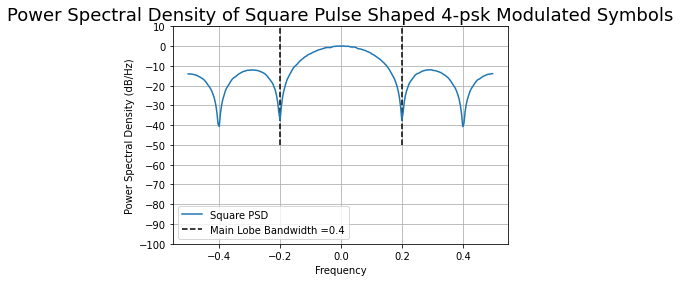

In [4]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 5    # Options: Any odd positive integer > 1

# Derived Bandwidth from User Adjustable Settings
timestep = 1.0 / samps_per_symb
sqr_bw   = 2 * timestep

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='sqr', span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Square Pulse Shape
ldapm_rand_square_pulses = ldapm_modem.get_samps(rand_symbols)

# Plotting the Fourier Transform of the Square Pulse Shaped Modulated Symbols
plt.psd(ldapm_rand_square_pulses, NFFT=nfft, Fs=fs, label='Square PSD')
plt.vlines([-timestep, timestep], -50, 10, colors='k', linestyles='dashed', label='Main Lobe Bandwidth ='+str(sqr_bw))
plt.title('Power Spectral Density of Square Pulse Shaped ' + str(mod_order) + '-' + mod_type + ' Modulated Symbols', fontsize=fontsize)
plt.ylim([-100, 10])
plt.yticks(np.arange(-100, 20, 10))
plt.legend(loc=3)
plt.show()

Note the large sidelobes (peaks outside of the black bars) of the sinc pulse. **As will be discussed in a later example, these large sidelobes, among other reasons, make square pulse shaping impractical for real-world applications.**

*Exercise: Try changing the modulation and pulse shaping parameters in the code block above to see their impact on the Fourier transform of the square pulse shaped modulated symbols. Note that the Fourier transform does not change for different LDAPM modulation types and orders.*

### Raised Cosine Pulse Shaping

As just discussed, square pulses are impractical for real-world applications due to their poor frequency domain properties, among other reasons. A more practical pulse shape is the [raised cosine pulse shape](https://en.wikipedia.org/wiki/Raised-cosine_filter). 

*Again, in the following figures, the blue plot represents $p[k]$ and the red plot represents $S[k]$.*

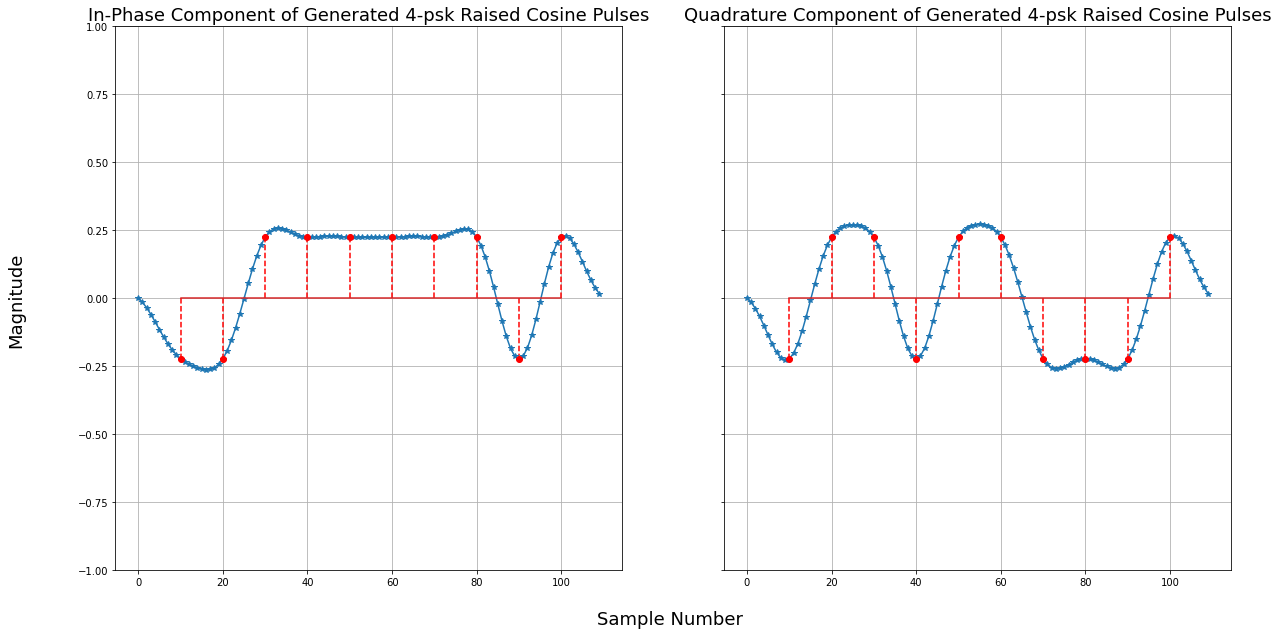

In [5]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_1)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
plt.ylim([-1.0, 1.0])
axs[0].grid()
axs[1].grid()
axs[0].set_title('In-Phase Component of Generated ' + str(mod_order) + '-' + mod_type + ' Raised Cosine Pulses', fontsize=fontsize)
axs[1].set_title('Quadrature Component of Generated ' + str(mod_order) + '-' + mod_type + ' Raised Cosine Pulses', fontsize=fontsize)
fig.text(0.51, 0.05, 'Sample Number', ha='center', fontsize=fontsize)
fig.text(0.05, 0.50, 'Magnitude', va='center', rotation='vertical', fontsize=fontsize)

# Plotting a Subset of the Generated Raised Cosine Pulses
axs[0].plot(ldapm_rand_raised_cosine_pulses.real, '-*')
axs[1].plot(ldapm_rand_raised_cosine_pulses.imag, '-*')
axs[0].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_raised_cosine_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].real, linefmt='--r', markerfmt='ro')
axs[1].stem(np.arange(samps_per_symb,(total_symbs_1+1)*samps_per_symb,samps_per_symb), ldapm_rand_raised_cosine_pulses[samps_per_symb:(total_symbs_1+1)*samps_per_symb:samps_per_symb].imag, linefmt='--r', markerfmt='ro')

plt.show()

*Exercise: Try changing the modulation and pulse shaping parameters in the code block above to see their impact on the raised cosine pulse shaped modulated symbols. Also note that the random sequence of symbols is different for each run.*

Next, we plot the magnitude of the Fourier transform of the derived raised cosine pulse shaped modulated symbols $p[k]$. The main lobe bandwidth of the raised cosine pulse shape is 

$BW_{rc} = 2\cdot(1+\beta)\cdot{R_{symb}}$,

where $\beta$ is the [roll-off factor](https://en.wikipedia.org/wiki/Raised-cosine_filter#Roll-off_factor) of the raised cosine pulse shape.

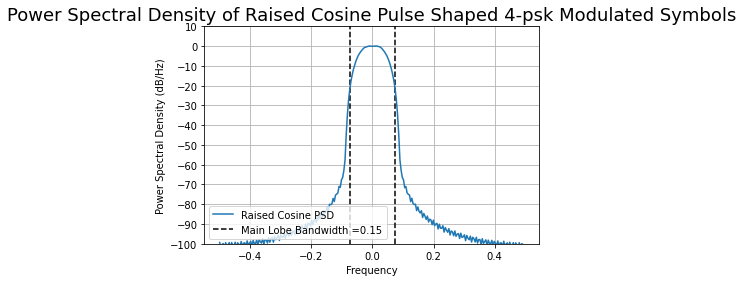

In [6]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Derived Bandwidth from User Adjustable Settings
timestep = 1.0 / samps_per_symb
rc_bw    = 2.0 * (1.0 * 0.75) * timestep

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Plotting the Fourier Transform of the Raised Cosine Pulse Shaped Modulated Symbols
plt.psd(ldapm_rand_raised_cosine_pulses, NFFT=nfft, Fs=fs, label='Raised Cosine PSD')
plt.vlines([-rc_bw/2.0, rc_bw/2.0], -100, 10, colors='k', linestyles='dashed', label='Main Lobe Bandwidth ='+str(round(rc_bw, 4)))
plt.title('Power Spectral Density of Raised Cosine Pulse Shaped ' + str(mod_order) + '-' + mod_type + ' Modulated Symbols', fontsize=fontsize)
plt.ylim([-100, 10])
plt.yticks(np.arange(-100, 20, 10))
plt.legend(loc=3)
plt.show()

Note the significantly reduced sidelobes (peaks outside of the black bars) when compared with the square pulse shaping function.

*Exercise: Try changing the modulation and pulse shaping parameters in the code block above to see their impact on the Fourier transform of the raised cosine pulse shaped modulated symbols. Note that the Fourier transform does not change for different LDAPM modulation types and orders.*

## Carrier Modulation

Once pulse shaping is applied to the modulated symbols, it is then used to modulate a complex sinusoid. Again, this is represented by the equation

$s[k] = p[k]e^{-2{\pi}f_c\frac{k}{R_{samp}}}$,

where $p[k]$ is the pulse shaped modulated symbols and $f_c$ is the center frequency of the carrier signal.

Here we plot the resulting $s[k]$ for raised cosine pulse shaping and show its resulting Fourier transform.

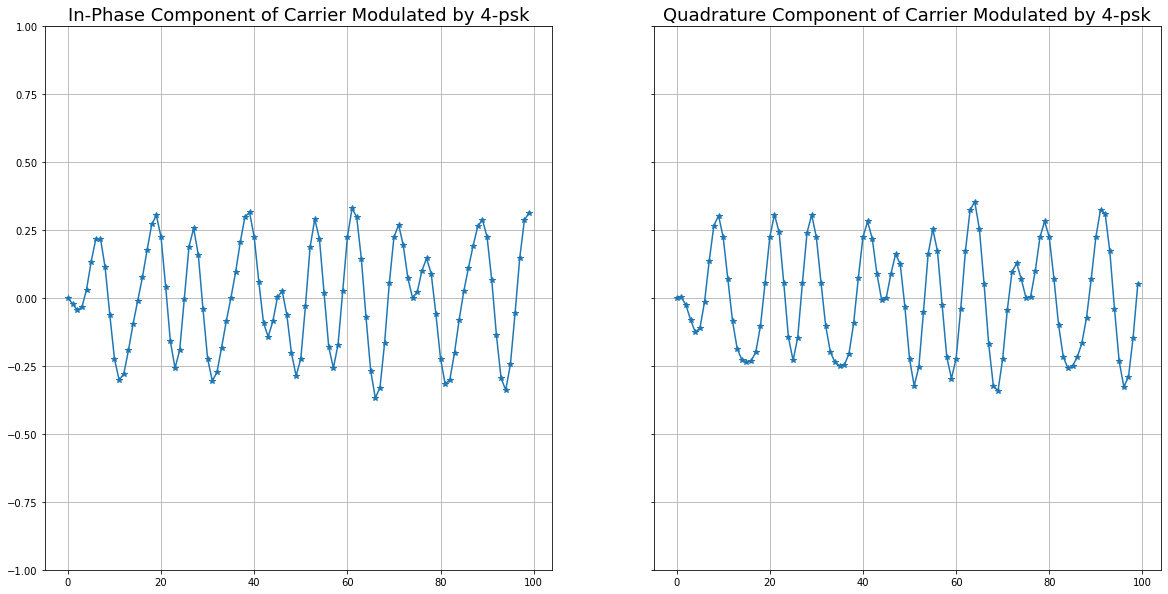

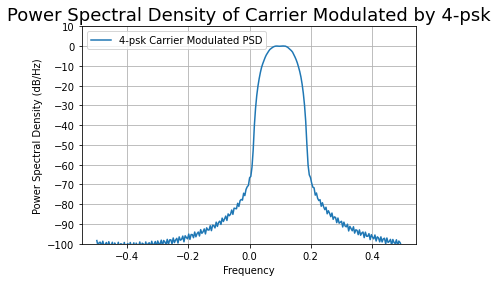

In [7]:
# Setting LDAPM Type and Order (User Adjustable)
mod_type  = 'psk'     # Options: 'ask', 'psk', 'qam'
mod_order = 4         # Options: Any positive power of 2 (must be an even power of 2 for 'qam' mod_type)

# Setting Pulse Shaping Parameters (User Adjustable)
samps_per_symb = 10   # Options: Any positive integer > 2
beta = 0.75           # Options: Any float in the range (0,1]

# Setting Carrier Frequency (User Adjustable)
carrier_freq = 0.1    # Options: Any float in the range [-0.5,0.5]

# Instantiating the LDAPM Modem and Generating Random LDAPM Symbols
ldapm_modem  = modems.ldapm(sps=samps_per_symb, mod_type=mod_type, mod_order=mod_order, filt_type='rc', beta=beta, span=span, trim=1)
rand_symbols = ldapm_modem.gen_symbs(total_symbs_2)

# Pulse Shaping the Random LDAPM Symbols with a Raised Cosine Pulse Shape
ldapm_rand_raised_cosine_pulses = ldapm_modem.get_samps(rand_symbols)

# Frequency Shifting the Carrier Signal to the User Defined Carrier Frequency
modulated_carrier = channels.freq_off(ldapm_rand_raised_cosine_pulses, carrier_freq)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=figsize)
plt.ylim([-1.0, 1.0])
axs[0].grid()
axs[1].grid()
axs[0].set_title('In-Phase Component of Carrier Modulated by ' + str(mod_order) + '-' + mod_type, fontsize=fontsize)
axs[1].set_title('Quadrature Component of Carrier Modulated by ' + str(mod_order) + '-' + mod_type, fontsize=fontsize)

# Plotting a Subset of the Generated Carrier Modulated Signal
samps_to_plot = total_symbs_1*samps_per_symb
axs[0].plot(modulated_carrier[0:samps_to_plot].real, '-*')
axs[1].plot(modulated_carrier[0:samps_to_plot].imag, '-*')
plt.show()

plt.psd(modulated_carrier, NFFT=nfft, Fs=fs, label=str(mod_order) + '-' + mod_type + ' Carrier Modulated PSD')
plt.title('Power Spectral Density of Carrier Modulated by ' + str(mod_order) + '-' + mod_type, fontsize=fontsize)
plt.ylim([-100, 0])
plt.yticks(np.arange(-100, 20, 10))
plt.legend()
plt.show()

Note that the Fourier transform plot shows the same shape as observed in the previous plot but the pulse has been shifted to the center frequency. The purpose and choice of the center frequency will be discussed in a later exercise.

*Exercise: Try changing the modulation, pulse shaping, and carrier frequency parameters in the code block above to see their impact on the Fourier transform of the raised cosine pulse shaped modulated symbols. Note that the Fourier transform does not change for different LDAPM modulation types and orders.*